<a href="https://colab.research.google.com/github/agnes-123/final_project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# New Section

In [ ]:
header = {"user-agent":'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}

In [ ]:
url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/er-ir/hk-interbank-ir-daily?segment=hibor.fixing&pagesize=3000&choose=end_of_day&from=2013-09-01&to=2023-09-30'
response = requests.get(url, headers=header)

In [ ]:
res_data = response.json()

In [ ]:
df = pd.DataFrame(res_data['result']['records'])
df.head()

,end_of_day,ir_overnight,ir_1w,ir_1m,ir_3m,ir_6m,ir_9m,ir_12m
0,2023-09-29,5.67929,5.74738,5.39661,5.27244,5.39036,NaN,5.50786
1,2023-09-28,5.80964,6.00548,5.39887,5.27316,5.38893,NaN,5.50786
2,2023-09-27,5.66452,5.92952,5.36232,5.28179,5.38726,NaN,5.50786
3,2023-09-26,5.77655,5.92673,5.36298,5.30655,5.36619,NaN,5.50768
4,2023-09-25,5.75738,5.79357,5.29161,5.28691,5.31054,NaN,5.50042


In [ ]:
df.shape

(2482, 8)

In [ ]:
url_2 = 'https://hk.finance.yahoo.com/quote/2800.HK/history'

In [ ]:
response_2800 = requests.get(url_2, headers = header)
string2800 = response_2800.text
html_2800 = BeautifulSoup(string2800, 'html.parser')

In [ ]:
url_2800 = html_2800.select_one('a.Fl\\(end\\).Mt\\(3px\\).Cur\\(p\\)')['href']

In [ ]:
df2800 = pd.read_csv(url_2800)
df2800.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,18.440001,18.730000,18.379999,18.500000,18.500000,143362187
1,2022-09-27,18.520000,18.559999,18.299999,18.520000,18.520000,330720570
2,2022-09-28,18.330000,18.330000,17.820000,17.900000,17.900000,361393488
3,2022-09-29,18.200001,18.280001,17.670000,17.799999,17.799999,160991346
4,2022-09-30,17.799999,17.990000,17.680000,17.889999,17.889999,108560912


In [ ]:
url_3 = 'https://hk.finance.yahoo.com/quote/%5EHSI/history'
response_HSI = requests.get(url_3, headers = header)
stringHSI = response_HSI.text
html_HSI = BeautifulSoup(stringHSI, 'html.parser')

In [ ]:
url_HSI = html_HSI.select_one('a.Fl\\(end\\).Mt\\(3px\\).Cur\\(p\\)')['href']

In [ ]:
df_HSI = pd.read_csv(url_HSI)
df_HSI.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,17781.869141,18077.640625,17727.400391,17855.140625,17855.140625,2557096600
1,2022-09-27,17838.650391,17904.210938,17648.419922,17860.310547,17860.310547,1900500000
2,2022-09-28,17703.390625,17703.390625,17184.539063,17250.880859,17250.880859,2948457300
3,2022-09-29,17570.169922,17629.669922,17046.830078,17165.869141,17165.869141,2534665600
4,2022-09-30,17165.929688,17344.810547,17016.279297,17222.830078,17222.830078,2113942500


In [ ]:
df2800['Date'] = pd.to_datetime(df2800['Date'], format='%Y-%m-%d')
df2800.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,18.440001,18.730000,18.379999,18.500000,18.500000,143362187
1,2022-09-27,18.520000,18.559999,18.299999,18.520000,18.520000,330720570
2,2022-09-28,18.330000,18.330000,17.820000,17.900000,17.900000,361393488
3,2022-09-29,18.200001,18.280001,17.670000,17.799999,17.799999,160991346
4,2022-09-30,17.799999,17.990000,17.680000,17.889999,17.889999,108560912


In [ ]:
df_HSI = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/^HSI?period1=1377993600&period2=1696032000&interval=1d&events=history&includeAdjustedClose=true')

In [ ]:
df_HSI.shape

(2485, 7)

In [ ]:
df_2800 = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/2800.hk?period1=1377993600&period2=1696032000&interval=1d&events=history&includeAdjustedClose=true')

In [ ]:
df_2800.shape

(2485, 7)

In [ ]:
df_2800.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-09-02,22.500000,22.90,22.500000,22.850000,16.436110,36690777
1,2013-09-03,22.900000,23.15,22.900000,23.000000,16.544006,33910605
2,2013-09-04,22.850000,23.10,22.799999,22.950001,16.508041,15896714
3,2013-09-05,23.200001,23.40,23.200001,23.250000,16.723829,51204017
4,2013-09-06,23.250000,23.40,23.250000,23.299999,16.759798,42129400


In [ ]:
df_hibor = df[['end_of_day','ir_overnight']]
df_hsi = df_HSI[['Date','Open']].rename(columns = {'Open':'Open_HSI'})
open_2800 = df_2800[['Date','Volume']]

In [ ]:
summary = df_hibor.merge(df_hsi, how = 'left', left_on = 'end_of_day', right_on = 'Date')\
                      .merge(open_2800,how = 'left', left_on = 'end_of_day', right_on = 'Date')
summary= summary.drop(['Date_x','Date_y'],axis = 1)
summary.head()

,end_of_day,ir_overnight,Open_HSI,Volume
0,2023-09-29,5.67929,17484.949219,139874906
1,2023-09-28,5.80964,17587.080078,216644621
2,2023-09-27,5.66452,17472.109375,161808669
3,2023-09-26,5.77655,17661.849609,230331169
4,2023-09-25,5.75738,18046.890625,244693864


In [ ]:
summary['end_of_day'] = summary['end_of_day'].apply(lambda v: datetime.strptime(v,'%Y-%m-%d'))
summary.head()

,end_of_day,ir_overnight,Open_HSI,Volume
0,2023-09-29,5.67929,17484.949219,139874906
1,2023-09-28,5.80964,17587.080078,216644621
2,2023-09-27,5.66452,17472.109375,161808669
3,2023-09-26,5.77655,17661.849609,230331169
4,2023-09-25,5.75738,18046.890625,244693864


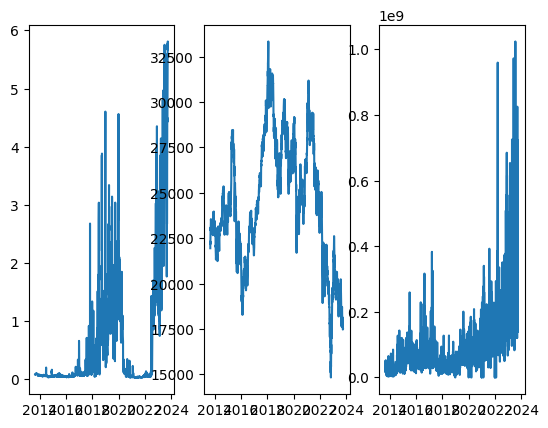

In [ ]:
plt.subplot(1, 3, 1)
plt.plot(summary['end_of_day'],summary['ir_overnight'])

plt.subplot(1, 3, 2)
plt.plot(summary['end_of_day'],summary['Open_HSI'])

plt.subplot(1, 3, 3)
plt.plot(summary['end_of_day'],summary['Volume'])

plt.show()

In [ ]:
summary_gp = summary.groupby(['ir_overnight']).agg({'Open_HSI':'mean','Volume':'mean'})
summary_gp = summary_gp.reset_index()

In [ ]:
X = summary_gp[['ir_overnight', 'Open_HSI']]
y = summary_gp['Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.predict(X_test)
r2_score(y_test, model.predict(X_test))

0.4744401994781803

In [ ]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 3.83149318e+07 -1.21393401e+04]


In [ ]:
#Time Series
from prophet import Prophet

In [ ]:
ts = df_hibor.merge(df_hsi, how = 'left', left_on = 'end_of_day', right_on = 'Date')\
                      .merge(df_2800[['Date','Adj Close']],how = 'left', left_on = 'end_of_day', right_on = 'Date')
ts= ts.drop(['Date_x','Date_y'],axis = 1)
ts['end_of_day'] = ts['end_of_day'].apply(lambda v: datetime.strptime(v,'%Y-%m-%d'))
ts = ts.rename(columns={'end_of_day':'ds','Adj Close':'y'})
ts.head()

,ds,ir_overnight,Open_HSI,y
0,2023-09-29,5.67929,17484.949219,18.440001
1,2023-09-28,5.80964,17587.080078,18.000000
2,2023-09-27,5.66452,17472.109375,18.250000
3,2023-09-26,5.77655,17661.849609,18.090000
4,2023-09-25,5.75738,18046.890625,18.340000


In [ ]:
m = Prophet()
m.fit(ts)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjd5d6e0p/clsty0wo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjd5d6e0p/ifnwd5qo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36352', 'data', 'file=/tmp/tmpjd5d6e0p/clsty0wo.json', 'init=/tmp/tmpjd5d6e0p/ifnwd5qo.json', 'output', 'file=/tmp/tmpjd5d6e0p/prophet_modelkf2tzkf5/prophet_model-20231007171921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:19:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:19:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

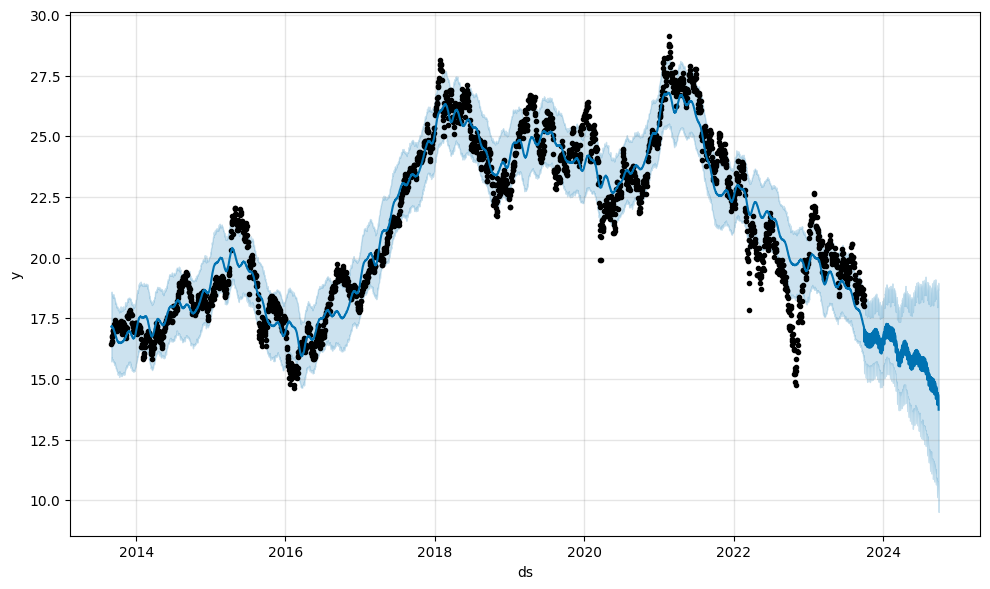

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
#any correlation between hibor, hsi and price

In [ ]:
ts_gp = ts.groupby('ir_overnight').agg({'Open_HSI':'mean','y':'mean'})
ts_gp = ts_gp.reset_index()

#X = ts_gp[['ir_overnight', 'Open_HSI']]
X = ts_gp[['ir_overnight', 'Open_HSI']]
y = ts_gp['y']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.predict(X_test)
r2_score(y_test, model.predict(X_test))

0.7774427098792658

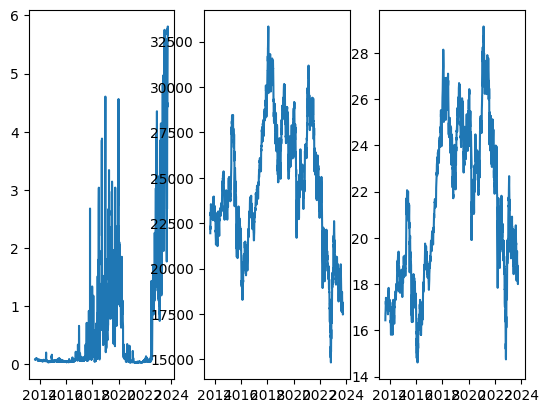

In [ ]:
plt.subplot(1, 3, 1)
plt.plot(ts['ds'],ts['ir_overnight'])

plt.subplot(1, 3, 2)
plt.plot(ts['ds'],ts['Open_HSI'])

plt.subplot(1, 3, 3)
plt.plot(ts['ds'],ts['y'])

plt.show()

In [ ]:
df_0002 = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/0002.hk?period1=1377993600&period2=1696032000&interval=1d&events=history&includeAdjustedClose=true')

In [ ]:
ts_0002 = df_hibor.merge(df_hsi, how = 'left', left_on = 'end_of_day', right_on = 'Date')\
                      .merge(df_0002[['Date','Adj Close']],how = 'left', left_on = 'end_of_day', right_on = 'Date')
ts_0002= ts_0002.drop(['Date_x','Date_y'],axis = 1)
ts_0002['end_of_day'] = ts_0002['end_of_day'].apply(lambda v: datetime.strptime(v,'%Y-%m-%d'))
ts_0002 = ts_0002.rename(columns={'end_of_day':'ds','Adj Close':'y'})
ts_0002.head()

,ds,ir_overnight,Open_HSI,y
0,2023-09-29,5.67929,17484.949219,57.950001
1,2023-09-28,5.80964,17587.080078,58.049999
2,2023-09-27,5.66452,17472.109375,58.400002
3,2023-09-26,5.77655,17661.849609,58.049999
4,2023-09-25,5.75738,18046.890625,58.450001


In [ ]:
ts0002 = ts_0002.groupby('ir_overnight').agg({'Open_HSI':'mean','y':'mean'})
ts0002 = ts0002.reset_index()

#X = ts0002[['ir_overnight', 'Open_HSI']]
X = ts0002[['ir_overnight']]
y = ts0002['y']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.predict(X_test)
r2_score(y_test, model.predict(X_test))

0.02551295661819941

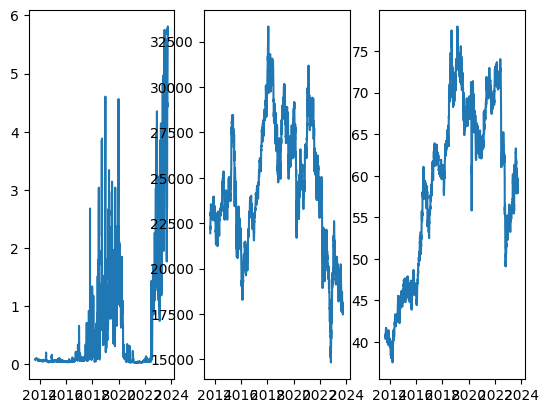

In [ ]:
plt.subplot(1, 3, 1)
plt.plot(ts_0002['ds'],ts_0002['ir_overnight'])

plt.subplot(1, 3, 2)
plt.plot(ts_0002['ds'],ts_0002['Open_HSI'])

plt.subplot(1, 3, 3)
plt.plot(ts_0002['ds'],ts_0002['y'])

plt.show()

In [ ]:
df_0823 = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/0823.hk?period1=1377993600&period2=1696032000&interval=1d&events=history&includeAdjustedClose=true')

In [ ]:
ts_0823 = df_hibor.merge(df_hsi, how = 'left', left_on = 'end_of_day', right_on = 'Date')\
                      .merge(df_0823[['Date','Adj Close']],how = 'left', left_on = 'end_of_day', right_on = 'Date')
ts_0823= ts_0823.drop(['Date_x','Date_y'],axis = 1)
ts_0823['end_of_day'] = ts_0823['end_of_day'].apply(lambda v: datetime.strptime(v,'%Y-%m-%d'))
ts_0823 = ts_0823.rename(columns={'end_of_day':'ds','Adj Close':'y'})
ts_0823.head()

,ds,ir_overnight,Open_HSI,y
0,2023-09-29,5.67929,17484.949219,38.400002
1,2023-09-28,5.80964,17587.080078,36.950001
2,2023-09-27,5.66452,17472.109375,36.650002
3,2023-09-26,5.77655,17661.849609,36.799999
4,2023-09-25,5.75738,18046.890625,37.299999


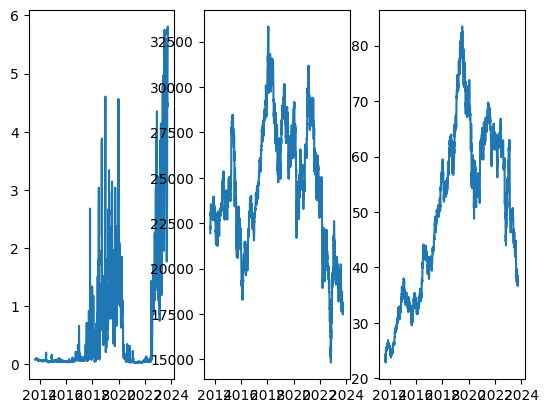

In [ ]:
plt.subplot(1, 3, 1)
plt.plot(ts_0823['ds'],ts_0823['ir_overnight'])

plt.subplot(1, 3, 2)
plt.plot(ts_0823['ds'],ts_0823['Open_HSI'])

plt.subplot(1, 3, 3)
plt.plot(ts_0823['ds'],ts_0823['y'])

plt.show()

In [ ]:
ts0823 = ts_0823.groupby('ir_overnight').agg({'Open_HSI':'mean','y':'mean'})
ts0823 = ts0823.reset_index()

#X = ts0823[['ir_overnight', 'Open_HSI']]
X = ts0823[['ir_overnight']]
y = ts0823['y']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.predict(X_test)
r2_score(y_test, model.predict(X_test))

0.04683678413512293

In [ ]:
url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/er-ir/hk-interbank-ir-daily?segment=hibor.fixing&pagesize=3000&choose=end_of_day&from=2013-09-01&to=2023-09-30'

response = requests.get(url, headers=header)

In [ ]:
res_data = response.json()
df1 = pd.DataFrame(res_data['result']['records'])

In [ ]:
df1.columns

Index(['end_of_day', 'ir_overnight', 'ir_1w', 'ir_1m', 'ir_3m', 'ir_6m',
       'ir_9m', 'ir_12m'],
      dtype='object')

In [ ]:
df_HSI = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/^HSI?period1=1377993600&period2=1696032000&interval=1d&events=history&includeAdjustedClose=true')
#df_HSI.to_csv('hsi',index = False)

In [ ]:
df_HSI = df_HSI.rename(columns={"Open":"hsi_open"})
df_HSI.head()

,Date,hsi_open,High,Low,Close,Adj Close,Volume
0,2013-09-02,21948.720703,22240.039063,21948.720703,22175.339844,22175.339844,1.813177e+09
1,2013-09-03,22323.000000,22456.800781,22290.830078,22394.580078,22394.580078,1.948186e+09
2,2013-09-04,22171.929688,22438.400391,22142.990234,22326.220703,22326.220703,3.996450e+09
3,2013-09-05,22538.960938,22682.939453,22486.630859,22597.970703,22597.970703,2.145320e+09
4,2013-09-06,22615.980469,22699.589844,22578.330078,22621.220703,22621.220703,1.960758e+09


In [ ]:
df_2800 = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/2800.hk?period1=1377993600&period2=1696032000&interval=1d&events=history&includeAdjustedClose=true')

In [ ]:
summary = df1.merge(df_HSI[['Date','hsi_open']],how = "left", left_on='end_of_day',right_on = 'Date')\
           .merge(df_2800[['Date','Adj Close']],how = "left", left_on='end_of_day',right_on = 'Date')

In [ ]:
summary_gp = summary.groupby('ir_overnight').agg({'hsi_open':'mean','Adj Close':'mean'}).reset_index()
summary_gp.head()

,ir_overnight,hsi_open,Adj Close
0,0.03289,28098.910156,26.829723
1,0.03396,27327.063151,25.747109
2,0.03451,24259.199219,23.063822
3,0.03455,24589.169922,23.963140
4,0.03459,25187.050781,24.337858


In [ ]:
#2 independent variables
X = summary_gp[['ir_overnight','hsi_open']]
y = summary_gp['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("r2_score_2_x: ",r2_score(y_test, y_pred))

r2_score_2_x:  0.778242586949585


In [ ]:
#Hibor

X = summary_gp[['ir_overnight']]
y = summary_gp['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("r2_score_hibor: ",r2_score(y_test, y_pred))

r2_score_hibor:  -0.00010405068678931428


In [ ]:
#only hsi
hsi_gp = summary.groupby('hsi_open').agg({'Adj Close':'mean'}).reset_index()
print("data size of hsi only: ",hsi_gp.shape)

X = hsi_gp[['hsi_open']]
y = hsi_gp['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("r2_score_hsi: ",r2_score(y_test, y_pred))

data size of hsi only:  (2478, 2)
r2_score_hsi:  0.7084933829387188


In [ ]:
df_HSI = df_HSI.rename(columns={"Open":"hsi_open"})
df_HSI.head()

In [ ]:
column_list = list(df_HSI.columns)
new_dict = {}

for item in column_list:
  new_dict[item] = "hsi_"+item

In [ ]:
df_HSI = df_HSI.rename(columns = new_dict)
df_HSI.head()

,hsi_Date,hsi_hsi_open,hsi_High,hsi_Low,hsi_Close,hsi_Adj Close,hsi_Volume
0,2013-09-02,21948.720703,22240.039063,21948.720703,22175.339844,22175.339844,1.813177e+09
1,2013-09-03,22323.000000,22456.800781,22290.830078,22394.580078,22394.580078,1.948186e+09
2,2013-09-04,22171.929688,22438.400391,22142.990234,22326.220703,22326.220703,3.996450e+09
3,2013-09-05,22538.960938,22682.939453,22486.630859,22597.970703,22597.970703,2.145320e+09
4,2013-09-06,22615.980469,22699.589844,22578.330078,22621.220703,22621.220703,1.960758e+09


In [ ]:
df = df1.merge(df_HSI,how = "left", left_on='end_of_day',right_on = 'hsi_Date')\
           .merge(df_2800,how = "left", left_on='end_of_day',right_on = 'Date')

In [ ]:
df.head()

,end_of_day,ir_overnight,ir_1w,ir_1m,ir_3m,ir_6m,ir_9m,ir_12m,hsi_Date,hsi_hsi_open,...,hsi_Close,hsi_Adj Close,hsi_Volume,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-29,5.67929,5.74738,5.39661,5.27244,5.39036,NaN,5.50786,2023-09-29,17484.949219,...,17809.660156,17809.660156,1.839910e+09,2023-09-29,18.129999,18.580000,18.120001,18.440001,18.440001,139874906
1,2023-09-28,5.80964,6.00548,5.39887,5.27316,5.38893,NaN,5.50786,2023-09-28,17587.080078,...,17373.029297,17373.029297,1.997139e+09,2023-09-28,18.250000,18.250000,17.969999,18.000000,18.000000,216644621
2,2023-09-27,5.66452,5.92952,5.36232,5.28179,5.38726,NaN,5.50786,2023-09-27,17472.109375,...,17611.869141,17611.869141,1.571624e+09,2023-09-27,18.110001,18.299999,18.110001,18.250000,18.250000,161808669
3,2023-09-26,5.77655,5.92673,5.36298,5.30655,5.36619,NaN,5.50768,2023-09-26,17661.849609,...,17466.900391,17466.900391,1.909387e+09,2023-09-26,18.280001,18.350000,17.990000,18.090000,18.090000,230331169
4,2023-09-25,5.75738,5.79357,5.29161,5.28691,5.31054,NaN,5.50042,2023-09-25,18046.890625,...,17729.289063,17729.289063,1.552391e+09,2023-09-25,18.469999,18.660000,18.340000,18.340000,18.340000,244693864


In [ ]:
#HIBOR and hsi_open on volume
df_gp = df.groupby('ir_overnight').agg({'hsi_hsi_open':'mean','Volume':'mean'}).reset_index()
print("data size of volume: ",df_gp.shape)

X = df_gp[['ir_overnight','hsi_hsi_open']]
y = df_gp['Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("r2_score_vol: ",r2_score(y_test, y_pred))

data size of volume:  (1820, 3)
r2_score_vol:  0.430401110148366
